In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('../north_h1n1_ha.csv')
df.columns

Index(['year', 'WHO_recommendation_name', 'WHO_recommendation_sequence',
       'dominant_strain_accession', 'dominant_strain_sequence',
       'dominant_strain_accession_name', 'qdistance_recommendation_accession',
       'qdistance_recommendation_sequence',
       'qdistance_recommendation_accession_name', 'ldistance_WHO',
       'ldistance_Qnet_recommendation', 'qnet_sample_size'],
      dtype='object')

In [13]:
xf=df[['ldistance_Qnet_recommendation','ldistance_WHO']]
dx=xf.diff(axis=1).iloc[:,1]
mx=dx.mean()
sx=dx.std()
zx=(dx-mx)/sx
# H0: dx==0
print(zx.mean())

6.055761952500853e-17


<AxesSubplot:>

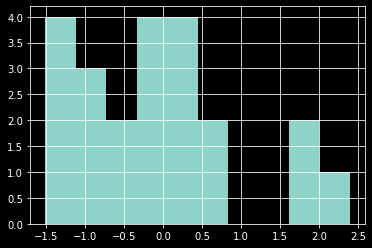

In [16]:
import pylab as plt
plt.style.use('dark_background')
zx.hist()

In [24]:
import numpy as np
F=2
print(mx - F*sx/(np.sqrt(dx.index.size)),mx,mx + F*sx/(np.sqrt(dx.index.size)))

1.5443725626546811 3.727272727272727 5.910172891890773


In [43]:
xf

,ldistance_Qnet_recommendation,ldistance_WHO
0,6,4
1,1,3
2,2,5
3,4,7
4,10,8
5,1,6
6,11,8
7,2,2
8,119,119
9,1,5


In [ ]:
wf=xf.iloc[:,1].values
qf=xf.iloc[:,0].values
lf=pd.DataFrame(((wf-qf)/wf)).replace(-np.inf,np.nan)#.dropna().mean()
lf.hist()

In [49]:
from distfit import distfit
#import distfit

In [61]:
dist = distfit()

# Search for best theoretical fit on your empirical data
dist.fit_transform(np.exp(lf.values))

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 29.7889] [loc=1.678 scale=0.704]
[distfit] >[expon     ] [0.00 sec] [RSS: 31.4573] [loc=0.368 scale=1.310]
[distfit] >[pareto    ] [0.06 sec] [RSS: 33.6027] [loc=-0.656 scale=1.024]
[distfit] >[dweibull  ] [0.02 sec] [RSS: 27.4526] [loc=1.453 scale=0.760]
[distfit] >[t         ] [0.06 sec] [RSS: 29.7884] [loc=1.678 scale=0.704]
[distfit] >[genextreme] [0.03 sec] [RSS: 28.6513] [loc=1.549 scale=0.790]
[distfit] >[gamma     ] [0.07 sec] [RSS: 29.8947] [loc=-10.464 scale=0.042]
[distfit] >[lognorm   ] [0.15 sec] [RSS: 29.81] [loc=-154.866 scale=156.543]
[distfit] >[beta      ] [0.08 sec] [RSS: 27.5899] [loc=0.134 scale=2.584]
[distfit] >[uniform   ] [0.00 sec] [RSS: 28.3491] [loc=0.368 scale=2.350]
[distfit] >[loggamma  ] [0.01 sec] [RSS: 28.7745] [loc=2.188 scale=0.490]
[distfit] >Compute confidence interval [parametric]


{'model': {'distr': <scipy.stats._continuous_distns.dweibull_gen at 0x7fa4426633a0>,
  'stats': 'RSS',
  'params': (2.3876437193219564, 1.4530677878141764, 0.7604166965962804),
  'name': 'dweibull',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fa4413eca00>,
  'score': 27.452582903045595,
  'loc': 1.4530677878141764,
  'scale': 0.7604166965962804,
  'arg': (2.3876437193219564,),
  'CII_min_alpha': 0.374727354997874,
  'CII_max_alpha': 2.531408220630479},
 'summary':          distr      score  LLE         loc       scale  \
 0     dweibull  27.452583  NaN    1.453068    0.760417   
 1         beta  27.589916  NaN    0.134487    2.583794   
 2      uniform  28.349108  NaN    0.367879    2.350402   
 3   genextreme  28.651252  NaN    1.548941    0.790338   
 4     loggamma  28.774545  NaN    2.188211    0.489614   
 5            t  29.788444  NaN    1.678108    0.704172   
 6         norm  29.788864  NaN    1.678111    0.704105   
 7      lognorm  29.809974  NaN -154.86575

[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nloggamma\nRSS(c=1.0493e-06, loc=1.00002, scale=6.31534e-07)'}, xlabel='Values', ylabel='Frequency'>)

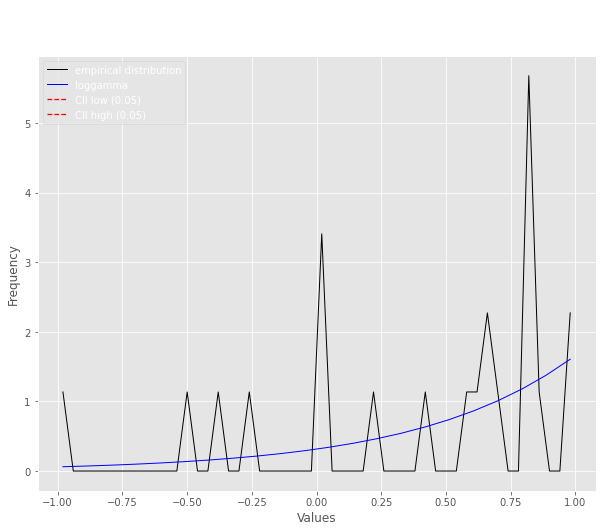

In [59]:
plt.style.use('ggplot')
dist.plot()

In [60]:
dist.summary

,distr,score,LLE,loc,scale,arg
0,loggamma,47.105813,NaN,1.000018,0.000001,"(1.0492975506710348e-06,)"
